In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import pandas as pd
import copy
sns.set()
sns.set(font_scale=5.3)

ENVS = [
    "fish-swim",
    "Ant-v2",
    "Humanoid-v2",
]
horizons = [
    400,
    400,
    1000,
]
our_methods = [
    "lfiw_tper_linear_k10.0",
    "lfiw_tper_adapt_linear",
    "lfiw_tper_linear_k10.0",
]

ALGOS = [
        "sac_full", 
        "lfiw_full",
        "tper_linear",
        ]

colors = {
    'sac_full': 'blue',
    "lfiw_full": 'green',
    "tper_linear": 'black',
    'lfiw_tper_adapt_linear': 'red',
    'lfiw_tper_linear_k10.0': 'red',
}
labels = {
    "discor_lfiw_full": "RM-Discor",
    "discor_full": "Discor",
    'lfiw_full': "Only On-policy",
    'tper_linear': "Only TCE",
    'sac_full': 'SAC',
    'lfiw_tper_adapt_linear': 'RM-TCE',
    'lfiw_tper_linear_k10.0': 'RM-TCE'
}
MAX_STEP=5e6
ROLLING_STEP=10

fish-swim
sac_full
599
578
552
599
(4, 400)
lfiw_full
564
595
599
597
599
564
599
599
(8, 400)
tper_linear
599
599
599
599
(4, 400)
lfiw_tper_linear_k10.0
525
544
539
526
(4, 400)
Ant-v2
sac_full
799
799
799
799
(4, 400)
lfiw_full
799
799
799
799
(4, 400)
tper_linear
399
399
399
399
(4, 399)
lfiw_tper_adapt_linear
424
413
540
506
(4, 400)
Humanoid-v2
sac_full
1610
1685
1770
1599
(4, 1000)
lfiw_full
1599
1599
1599
1599
(4, 1000)
tper_linear
999
999
999
999
(4, 999)
lfiw_tper_linear_k10.0
999
999
999
999
(4, 999)


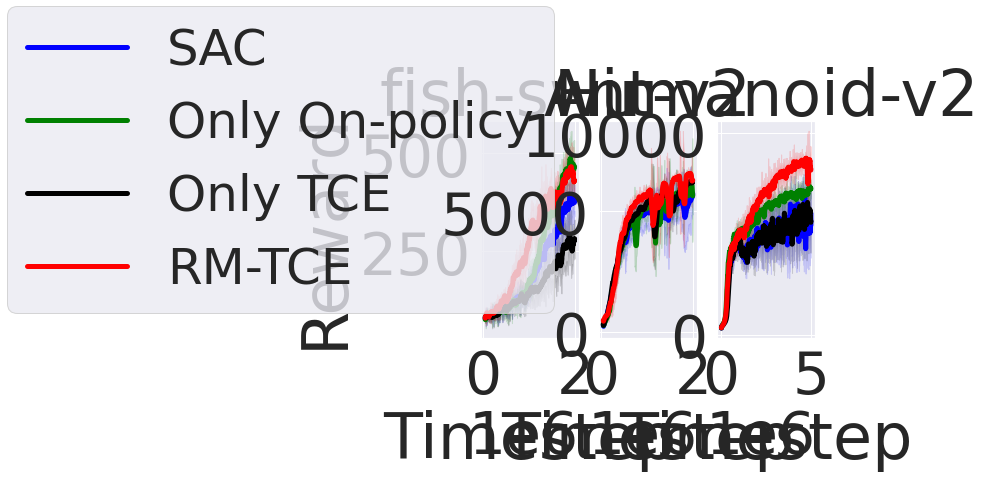

In [35]:

fig, axs = plt.subplots(1, 3)
index = -1
for EXP, horizon, our_method in zip(ENVS, horizons, our_methods):
    print(EXP)
    this_algo = copy.deepcopy(ALGOS)
    index += 1
    this_ax = axs[index]
    root_path = os.path.join("../../logs/"+EXP)
    this_algo.append(our_method)

    for algo in this_algo:
        print(algo)
        file = os.path.join(root_path, "%s-all.txt"%algo)
        try:
            with open(file, 'r') as f:
                content = f.readlines()
                all_rewards = []
                for line in content:
                    line_data = []
                    for i in line.split(" "):
                        try:
                            line_data.append(eval(i))
                        except SyntaxError:
                            # print("Warn: syntax err")
                            pass
                    print(len(line_data))
                    all_rewards.append(line_data[:horizon])
        except FileNotFoundError:
            pass
        all_rewards = np.array(all_rewards)
        print(all_rewards.shape)
        rew_mean = np.mean(all_rewards, axis=0)
        df = pd.DataFrame(rew_mean)
        rew_mean = df[0].rolling(ROLLING_STEP).mean()
        rew_std = np.std(all_rewards, axis=0)
        x = np.arange(0, MAX_STEP, 5e3)[:len(rew_mean)]
        plot_index = np.arange(0, len(x), 1)
        rew_mean = rew_mean[plot_index]
        rew_std = rew_std[plot_index]
        x = x[plot_index]
        this_ax.plot(x, rew_mean, color=colors[algo], label=labels[algo], lw=5)
        this_ax.fill_between(x, rew_mean - 0.6*rew_std, rew_mean + 0.6*rew_std, color = colors[algo], alpha = 0.15)

    this_ax.set_title(EXP)
    this_ax.set_xlabel("Timestep")
    if index == 0:
        this_ax.legend(prop={'size': 50})
        this_ax.set_ylabel("Reward")
    # this_ax.ticklabel_format(axis='y', style='sci', scilimits=(4,4))


In [36]:
length=15
fig.set_size_inches(length*4.0, length)
fig.savefig("ablation-mujoco-three.png", bbox_inches = 'tight',
    pad_inches = 0)